In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [7]:
!cd yolov5 

In [10]:
!pip3 install -r ./yolov5/requirements.txt

     |████████████████████████████████| 190 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 47.2 MB/s eta 0:00:01
     |████████████████████████████████| 61.7 MB 76 kB/s s eta 0:00:01
     |████████████████████████████████| 3.5 MB 93.7 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 32.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 646 kB 62.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 37.8 MB/s eta 0:00:01    |██████████████████▌             | 7.2 MB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 819 kB 99.6 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 370 kB/s  eta 0:00:01
     |████████████████████████████████| 301 kB 44.7 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 85.6 MB/s eta 0:00:01
     |██████████████████████████████

In [4]:
ls


data/  labelImg/  ObjectDetection.ipynb  README.md  yolov5/  yolov5s.pt


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/home/joeycruz/python-environments/env/lib/python3.8/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/joeycruz/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-30 Python-3.8.10 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8114MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [13]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Testing detection

In [ ]:
img = 'https://miutrgv.github.io/images/resources/lab.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 5. Creating my own custom model

In [ ]:
import uuid     # Creating a unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images')  # /data/images
labels = ['target']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

        # Writes out image to file
        cv2.imwrite(imgname,frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
        

In [ ]:
labels[0]

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        print(imgname)


In [ ]:
!git clone https://github.com/HumanSignal/labelImg.git

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!pip install certifi

In [32]:
! python ./yolov5/train.py --img 320 --batch 16 --epochs 50 --data ./dataset.yaml --weights ./yolov5s.pt --workers 2

train: weights=./yolov5s.pt, cfg=, data=./dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.8.10 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8114MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)
model.conf = 0.75

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/joeycruz/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-30 Python-3.8.10 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8114MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [49]:
import os
img = os.path.join('data', 'train', 'images', 'target.0.jpg')

In [50]:
results = model(img)

In [51]:
print(results)

image 1/1: 1080x1920 1 target
Speed: 22.1ms pre-process, 6.8ms inference, 3.3ms NMS per image at shape (1, 3, 384, 640)


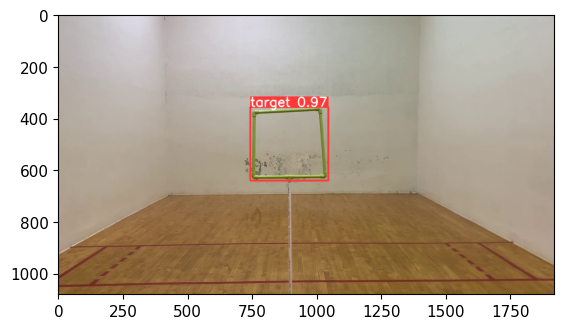

In [52]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()